# Proyecto Final: Telecomunicaciones: identificar operadores ineficaces

### Presentación PDF y Enlace a Tableu <a href="https://drive.google.com/drive/folders/1jAercZXmPutAPD_lQSfd90o4ET6-QNvK?usp=sharing">Enlacea carpeta de GoogleDrive</a>

## Análisis exploratorio de datos

In [1]:
#Librerias
import pandas as pd

In [2]:
#Lectura de datos
df_calls = pd.read_csv('/datasets/telecom_dataset_us.csv')
df_clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [3]:
#Visualización de datos

df_calls.info()
df_clients.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2 

In [4]:
display(df_calls.head())
display(df_clients.head())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
#Tratar valores nulos
print(df_calls['operator_id'].unique())
print(len(df_calls['operator_id'].unique()))

[    nan 880022. 880020. ... 952916. 959118. 957922.]
1093


In [6]:
#El contexto objetivo es detectar operadores ineficaces, donde no existe dato de operador se omitiran dichos registros
df_calls=df_calls.dropna(subset=["operator_id"])

In [7]:
display(df_calls)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25
5,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,False,2,3,29
...,...,...,...,...,...,...,...,...,...
53896,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,False,1,0,25
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190


In [8]:
#Eliminar duplicados
df_calls = df_calls.drop_duplicates()
df_clients = df_clients.drop_duplicates()

In [9]:
#Corregir tipos de dato
df_clients["date_start"] = pd.to_datetime(df_clients["date_start"])
df_calls["operator_id"] = df_calls["operator_id"].astype(object)

In [10]:
#Revisar el resultado del procesamiento
df_calls.info()
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41546 entries, 1 to 53899
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              41546 non-null  int64 
 1   date                 41546 non-null  object
 2   direction            41546 non-null  object
 3   internal             41491 non-null  object
 4   operator_id          41546 non-null  object
 5   is_missed_call       41546 non-null  bool  
 6   calls_count          41546 non-null  int64 
 7   call_duration        41546 non-null  int64 
 8   total_call_duration  41546 non-null  int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 2.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object   

## Identificar operadores ineficaces

### Criterios
- Tiene una gran cantidad de llamadas entrantes perdidas (internas y externas).
- Tiempo de espera prolongado para las llamadas entrantes.
- Número reducido de llamadas salientes

#### Tiene una gran cantidad de llamadas entrantes perdidas (internas y externas)

In [11]:
df_c1 = df_calls[(df_calls["is_missed_call"]==True) & (df_calls["direction"]=="in")]
df_c1_group = df_c1.groupby(by="operator_id")['calls_count'].sum().reset_index()
df_c1 = df_c1_group
display(df_c1)

,operator_id,calls_count
0,882680.0,3
1,882684.0,4
2,882686.0,6
3,882690.0,2
4,884408.0,4
...,...,...
234,959312.0,7
235,960620.0,1
236,964510.0,2
237,964666.0,3


In [12]:
df_c1.describe(percentiles=[.10,.25,.40,.55,.60,.75,.80,.90,.95,.98])

,operator_id,calls_count
count,239.000000,239.000000
mean,921162.887029,3.874477
std,20455.534602,5.943089
min,882680.000000,1.000000
10%,894203.200000,1.000000
25%,905202.000000,1.000000
40%,913807.600000,1.000000
50%,920726.000000,2.000000
55%,924889.800000,2.000000
60%,928288.000000,2.000000


In [13]:
df_c1[df_c1["calls_count"]>=10].describe(percentiles=[.10,.25,.40,.55,.60,.75,.80,.90,.95,.98])

,operator_id,calls_count
count,24.000000,24.000000
mean,926260.583333,18.416667
std,20554.053416,9.426681
min,885876.000000,10.000000
10%,896226.800000,10.000000
25%,912693.500000,11.750000
40%,922638.800000,15.000000
50%,934707.000000,15.500000
55%,939666.800000,16.650000
60%,940615.200000,17.000000


<AxesSubplot:xlabel='calls_count'>

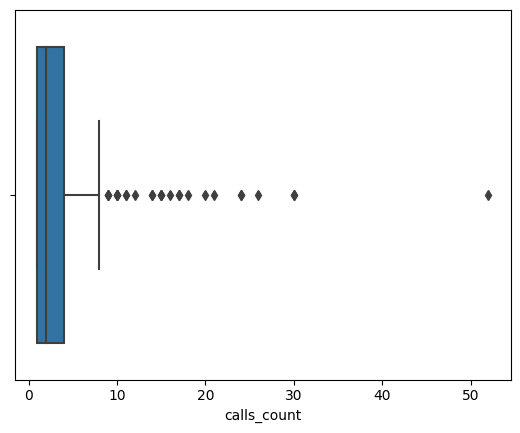

In [14]:
import seaborn as sns
sns.boxplot(data=df_c1, x="calls_count")

- Definimos 14 ya que es la mediana ente el valor de los valores no atipicos y el promedio

In [15]:
df_c1 = df_c1[df_c1['calls_count']>14].sort_values(by='calls_count', ascending=False).reset_index(drop=True)
display(df_c1)

,operator_id,calls_count
0,913942.0,52
1,940588.0,30
2,944226.0,30
3,885890.0,26
4,937956.0,24
5,944216.0,24
6,951508.0,21
7,885876.0,20
8,944220.0,18
9,940630.0,17


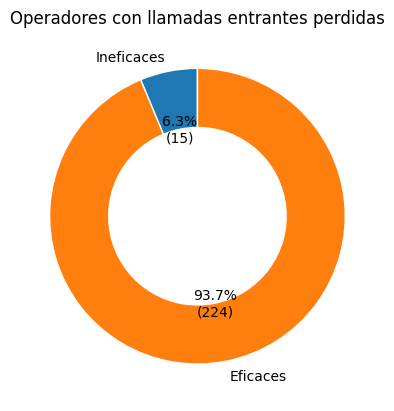

In [16]:
import matplotlib.pyplot as plt


ineficaces_c1 = df_c1_group[df_c1_group['operator_id'].isin(df_c1['operator_id'])]['calls_count'].count()
eficaces_c1 = df_c1_group[~df_c1_group['operator_id'].isin(df_c1['operator_id'])]['calls_count'].count()

data = [ineficaces_c1, eficaces_c1]
labels = ['Ineficaces', 'Eficaces']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(data)/100)})',
       startangle=90, wedgeprops={'width':0.4, 'edgecolor':'white'})  # dona

ax.set_title("Operadores con llamadas entrantes perdidas")
plt.show()


#### Tiempo de espera prolongado para las llamadas entrantes.

In [17]:
df_c2 = df_calls[df_calls['direction']=='in']
df_c2['wait_time'] = df_c2['total_call_duration'] - df_c2['call_duration']
display(df_c2)

/tmp/ipykernel_738/947876340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c2['wait_time'] = df_c2['total_call_duration'] - df_c2['call_duration']


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,wait_time
26,166377,2019-08-12 00:00:00+03:00,in,False,880028.0,False,1,407,411,4
34,166377,2019-08-13 00:00:00+03:00,in,False,880028.0,False,1,88,102,14
37,166377,2019-08-14 00:00:00+03:00,in,False,880026.0,False,2,197,218,21
39,166377,2019-08-14 00:00:00+03:00,in,False,880028.0,False,1,33,37,4
49,166377,2019-08-15 00:00:00+03:00,in,False,880028.0,False,1,23,27,4
...,...,...,...,...,...,...,...,...,...,...
53868,168601,2019-11-25 00:00:00+03:00,in,False,952914.0,False,7,1229,1282,53
53872,168601,2019-11-26 00:00:00+03:00,in,False,952914.0,False,4,539,562,23
53877,168601,2019-11-27 00:00:00+03:00,in,False,952914.0,False,2,53,77,24
53891,168606,2019-11-08 00:00:00+03:00,in,False,957922.0,True,1,0,7,7


In [18]:
df_c2=df_c2.groupby(by="operator_id")['wait_time'].mean().reset_index()
df_c2_group = df_c2
display(df_c2)

,operator_id,wait_time
0,879896.0,27.333333
1,879898.0,29.473684
2,880020.0,7.714286
3,880022.0,14.000000
4,880026.0,7.944444
...,...,...
749,971102.0,338.000000
750,971354.0,42.000000
751,972412.0,25.000000
752,972460.0,4.000000


In [19]:
df_c2["operator_id"] = df_c2["operator_id"].astype(object)
df_c2.describe(percentiles=[.10,.75,.80,.90,.95,.98])

,wait_time
count,754.000000
mean,57.612807
std,94.456737
min,1.000000
10%,9.766667
50%,31.000000
75%,58.000000
80%,69.100000
90%,114.050000
95%,187.413480


<AxesSubplot:xlabel='wait_time'>

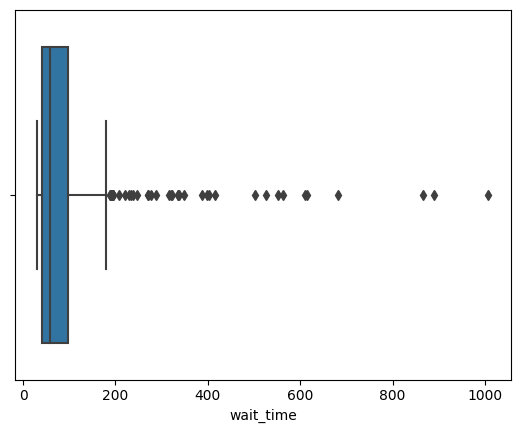

In [20]:
sns.boxplot(data=df_c2[df_c2["wait_time"]>31], x="wait_time")

In [21]:
df_c2 = df_c2[df_c2["wait_time"]>=100].sort_values(by='wait_time', ascending=False).reset_index(drop=True)
display(df_c2)

,operator_id,wait_time
0,919794.0,1007.375000
1,906070.0,889.800000
2,919790.0,866.803279
3,931458.0,681.961538
4,921318.0,615.418182
...,...,...
87,911138.0,101.607143
88,891414.0,100.389831
89,885876.0,100.188889
90,911310.0,100.072727


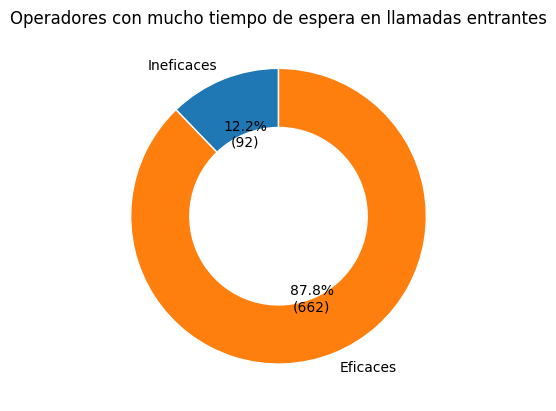

In [22]:
ineficaces_c2 = df_c2_group[df_c2_group['operator_id'].isin(df_c2['operator_id'])]["operator_id"].count()
eficaces_c2 = df_c2_group[~df_c2_group['operator_id'].isin(df_c2['operator_id'])]["operator_id"].count()

data = [ineficaces_c2, eficaces_c2]
labels = ['Ineficaces', 'Eficaces']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(data)/100)})',
       startangle=90, wedgeprops={'width':0.4, 'edgecolor':'white'})  # dona

ax.set_title("Operadores con mucho tiempo de espera en llamadas entrantes")
plt.show()

- Se tomo el porcentil 50 superior con tiempo en promedio más alto y visualizando el diagrama de bigotes ua filtrado se determinó el porcentíl 75 (valor 100)

#### Número reducido de llamadas salientes

In [23]:
df_c3 = df_calls[df_calls['direction']=='out']
df_c3['operator_id'] = df_c3['operator_id'].astype(object)
df_c3_group = df_c3.groupby(by='operator_id')['calls_count'].sum().reset_index()
df_c3 = df_c3_group
display(df_c3)

/tmp/ipykernel_738/1457918884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c3['operator_id'] = df_c3['operator_id'].astype(object)


,operator_id,calls_count
0,879896.0,872
1,879898.0,7209
2,880020.0,38
3,880022.0,189
4,880026.0,2208
...,...,...
877,972408.0,6
878,972410.0,77
879,972412.0,60
880,972460.0,50


In [24]:
df_c3.describe(percentiles=[.10,.25,.30,.75,.80,.90,.95,.98])

,operator_id,calls_count
count,882.000000,882.000000
mean,925658.340136,689.731293
std,22862.558731,3122.953946
min,879896.000000,1.000000
10%,893400.200000,3.000000
25%,906394.500000,11.000000
30%,909619.000000,17.000000
50%,924959.000000,90.000000
75%,943630.000000,597.250000
80%,945860.800000,828.600000


<AxesSubplot:xlabel='calls_count'>

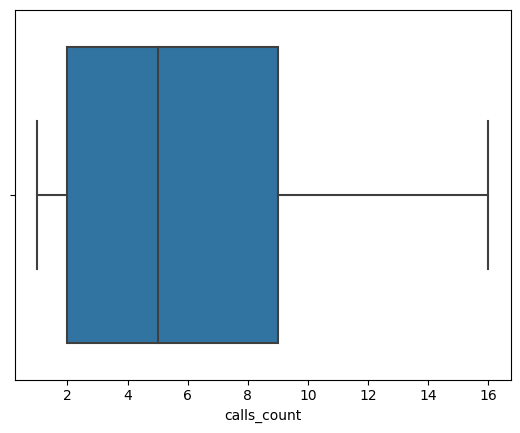

In [25]:
sns.boxplot(data=df_c3[df_c3["calls_count"]<17], x="calls_count")

In [26]:
df_c3 = df_c3[df_c3["calls_count"]<17].sort_values(by='calls_count', ascending=True).reset_index(drop=True)
display(df_c3)

,operator_id,calls_count
0,882478.0,1
1,937956.0,1
2,939698.0,1
3,940610.0,1
4,908834.0,1
...,...,...
257,945052.0,16
258,908002.0,16
259,944476.0,16
260,924614.0,16


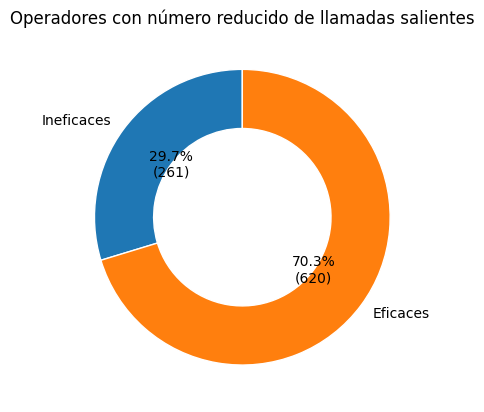

In [27]:
ineficaces_c3 = df_c3_group[df_c3_group['operator_id'].isin(df_c3['operator_id'])]["operator_id"].count()
eficaces_c3 = df_c3_group[~df_c3_group['operator_id'].isin(df_c3['operator_id'])]["operator_id"].count()

data = [ineficaces_c3, eficaces_c3]
labels = ['Ineficaces', 'Eficaces']

fig, ax = plt.subplots()
ax.pie(data, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p*sum(data)/100)})',
       startangle=90, wedgeprops={'width':0.4, 'edgecolor':'white'})  # dona

ax.set_title("Operadores con número reducido de llamadas salientes")
plt.show()

In [28]:
# Convertir cada columna a un conjunto
ids_c1 = set(df_c1["operator_id"])
ids_c2 = set(df_c2["operator_id"])
ids_c3 = set(df_c3["operator_id"])

# Intersección de los tres conjuntos
common_ids = ids_c1 & ids_c2 & ids_c3

# Convertir el resultado a DataFrame
df_common123 = pd.DataFrame({"operator_id": list(common_ids)})

display(df_common123)

,operator_id


- Son los operadores más ineficaces (cumplen los 3 criterios de ineficacia)

In [29]:
# Convertir cada columna a un conjunto
ids_c1 = set(df_c1["operator_id"])
ids_c2 = set(df_c2["operator_id"])

# Intersección de los tres conjuntos
common_ids = ids_c1 & ids_c2

# Convertir el resultado a DataFrame
df_common12 = pd.DataFrame({"operator_id": list(common_ids)})

display(df_common12)

,operator_id
0,944226.0
1,885890.0
2,940588.0
3,940622.0
4,951508.0
5,885876.0
6,913942.0
7,940630.0
8,944216.0
9,944222.0


In [30]:
# Convertir cada columna a un conjunto
ids_c2 = set(df_c2["operator_id"])
ids_c3 = set(df_c3["operator_id"])

# Intersección de los tres conjuntos
common_ids = ids_c2 & ids_c3

# Convertir el resultado a DataFrame
df_common23 = pd.DataFrame({"operator_id": list(common_ids)})

display(df_common23)


,operator_id
0,919554.0
1,908834.0
2,944228.0
3,919204.0
4,919206.0
5,906076.0
6,969294.0
7,970254.0
8,961552.0
9,909134.0


In [31]:
# Convertir cada columna a un conjunto


ids_c1 = set(df_c1["operator_id"])
ids_c3 = set(df_c3["operator_id"])

# Intersección de los tres conjuntos
common_ids = ids_c1 & ids_c3   # también funciona ids_c1.intersection(ids_c2, ids_c3)

# Convertir el resultado a DataFrame
df_common13 = pd.DataFrame({"operator_id": list(common_ids)})

display(df_common13)




,operator_id
0,937956.0
1,905862.0


- Los operadores ineficases son:

In [32]:
# Concatenar los DataFrames
df_all = pd.concat([df_common12, df_common13, df_common12, df_common123])

# Eliminar duplicados
df_all_unique = df_all.drop_duplicates(subset=["operator_id"]).reset_index(drop=True)

display(df_all_unique)

,operator_id
0,944226.0
1,885890.0
2,940588.0
3,940622.0
4,951508.0
5,885876.0
6,913942.0
7,940630.0
8,944216.0
9,944222.0


## Prueba las hipótesis estadísticas

In [33]:

df_c1_f = df_c1_group[~df_c1_group['operator_id'].isin(df_all_unique['operator_id'])]
display(df_c1_f)


,operator_id,calls_count
0,882680.0,3
1,882684.0,4
2,882686.0,6
3,882690.0,2
4,884408.0,4
...,...,...
234,959312.0,7
235,960620.0,1
236,964510.0,2
237,964666.0,3


- H1 Hay un promedio significativamente mayor entre los operadores ineficaces con los demás en las llamadas perdidas.
- H0 No hay un promedio significativo entre los operadores ineficaces con los demás en las llamadas perdidas.

In [34]:

from scipy import stats

t_stat, p_bilateral = stats.ttest_ind(df_c1_group[df_c1_group['operator_id'].isin(df_all_unique['operator_id'])]['calls_count'],df_c1_f['calls_count'])
p_value = p_bilateral / 2 if t_stat > 0 else 1 - (p_bilateral / 2)

alpha=0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")


Rechazamos la hipótesis nula


In [35]:
df_c2_f = df_c2_group[~df_c2_group['operator_id'].isin(df_all_unique['operator_id'])][['operator_id','wait_time']]
display(df_c2_f)

,operator_id,wait_time
0,879896.0,27.333333
1,879898.0,29.473684
2,880020.0,7.714286
3,880022.0,14.000000
4,880026.0,7.944444
...,...,...
749,971102.0,338.000000
750,971354.0,42.000000
751,972412.0,25.000000
752,972460.0,4.000000


- H1 Hay un promedio significativamente mayor entre los operadores ineficaces con los demás en el tiempo de espera en las llamadas.
- H0 No hay un promedio significativo entre los operadores ineficaces con los demás en el tiempo de espera en las llamadas.

In [36]:
t_stat, p_bilateral = stats.ttest_ind(df_c2_group[df_c2_group['operator_id'].isin(df_all_unique['operator_id'])]['wait_time'],df_c2_f['wait_time'])
p_value = p_bilateral / 2 if t_stat > 0 else 1 - (p_bilateral / 2)

alpha=0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

Rechazamos la hipótesis nula


In [37]:
df_c3_f = df_c3_group[~df_c3_group['operator_id'].isin(df_all_unique['operator_id'])]
display(df_c3_f)

,operator_id,calls_count
0,879896.0,872
1,879898.0,7209
2,880020.0,38
3,880022.0,189
4,880026.0,2208
...,...,...
877,972408.0,6
878,972410.0,77
879,972412.0,60
880,972460.0,50


- H1 Existe un promedio significativo reducido de llamadas salientes
- H0 No existe un promedio significativo reducido de llamadas salientes

In [38]:
t_stat, p_bilateral = stats.ttest_ind(df_c3_group[df_c3_group['operator_id'].isin(df_all_unique['operator_id'])]['calls_count'],df_c3_f['calls_count'])
p_value = p_bilateral / 2 if t_stat < 0 else 1 - (p_bilateral / 2)
alpha=0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

No se puede rechazar la hipótesis nula


- El promedio si es significativamente mayor para los operadores en las llamadas perdidas por lo cuál si son ineficaces.
- Significativamente en el promedio de tiempo de espera en las llamadas son ineficaces los operadores detectados.
- El promedio de llamadas salientes es significativamente bajo en los operadores ineficaces detectados.